Part 1: Data Processing

In [309]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [310]:
df= pd.read_csv(r"C:\Users\16479\Downloads\train.csv",sep=';')

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [312]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [313]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


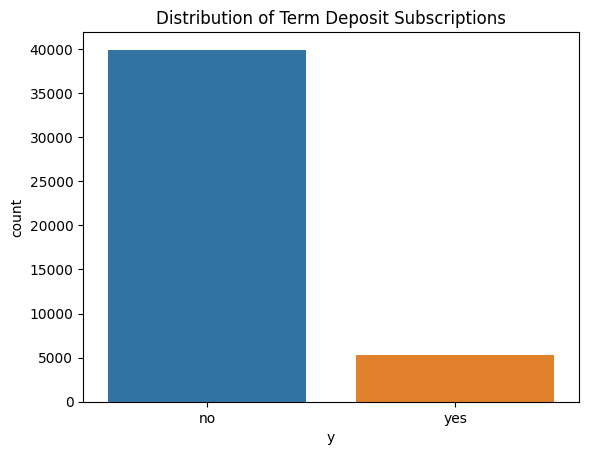

In [314]:


sns.countplot(x='y', data=df)
plt.title('Distribution of Term Deposit Subscriptions')
plt.show()

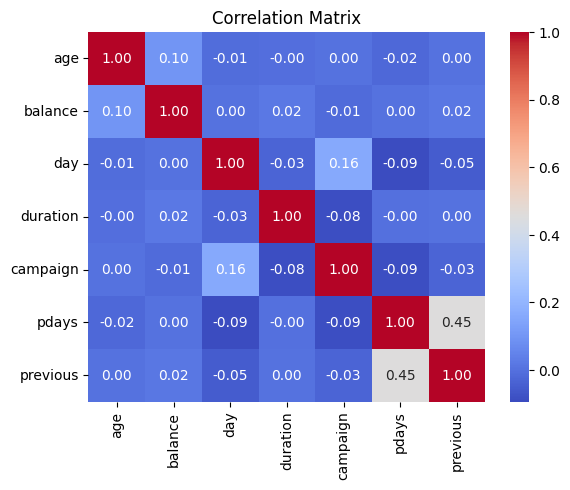

In [315]:
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()     

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [316]:
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


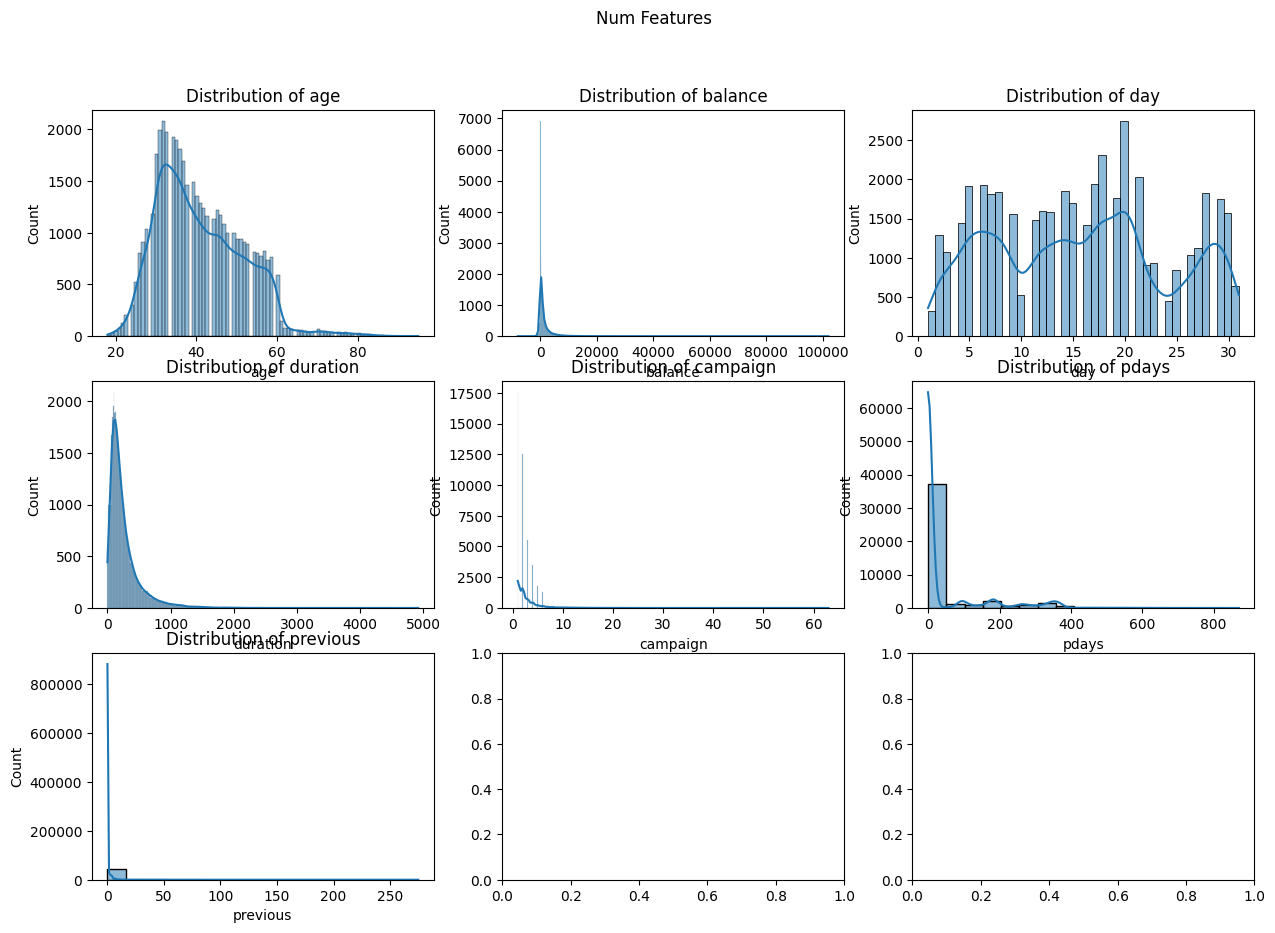

In [317]:

numeric_columns = df.select_dtypes(include='number')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Num Features')

axes = axes.flatten()

for i, column in enumerate(numeric_columns.columns):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')

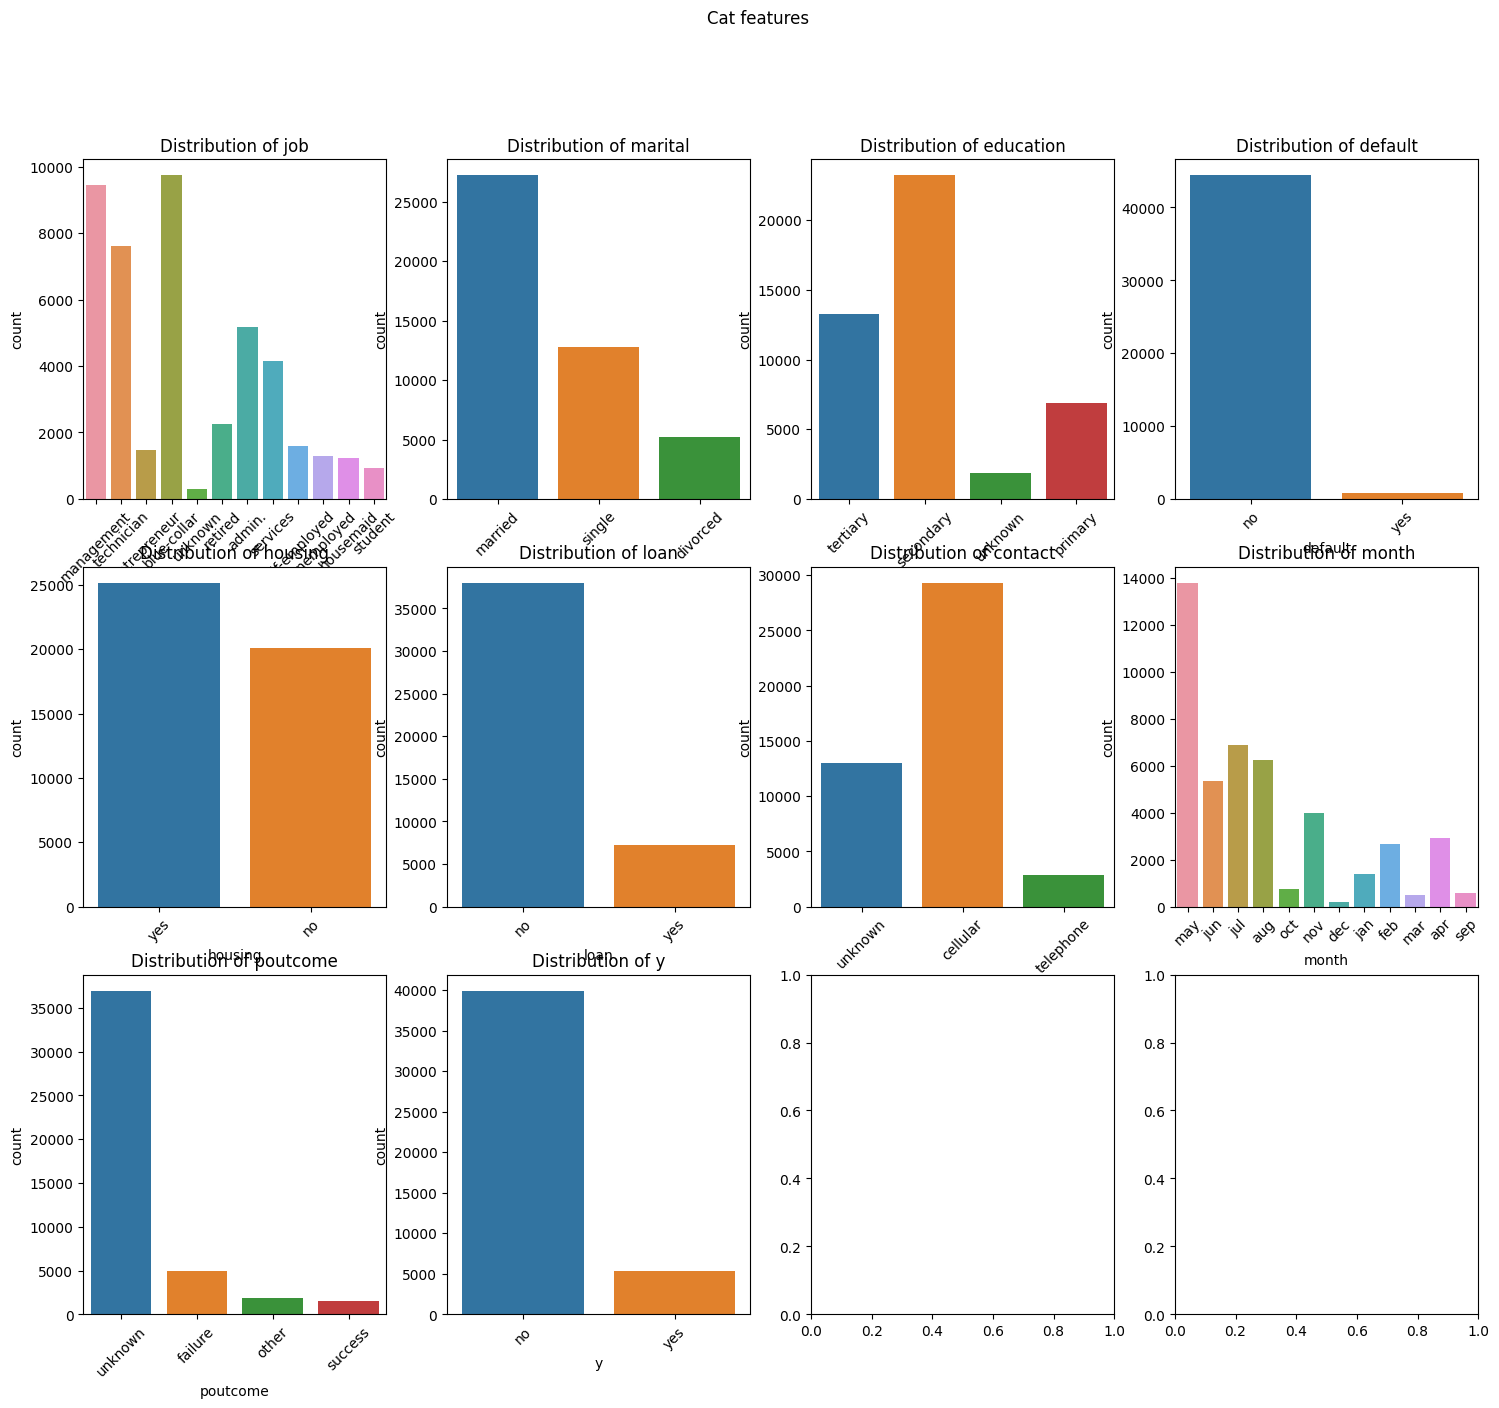

In [318]:
 categorical_columns = df.select_dtypes(include='object')
num_columns = len(categorical_columns.columns)
num_rows = (num_columns // 4) + (1 if num_columns % 4 != 0 else 0)
num_cols = min(num_columns, 4)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 5))
fig.suptitle('Cat features')
axes = axes.flatten()

for i, column in enumerate(categorical_columns.columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=45)

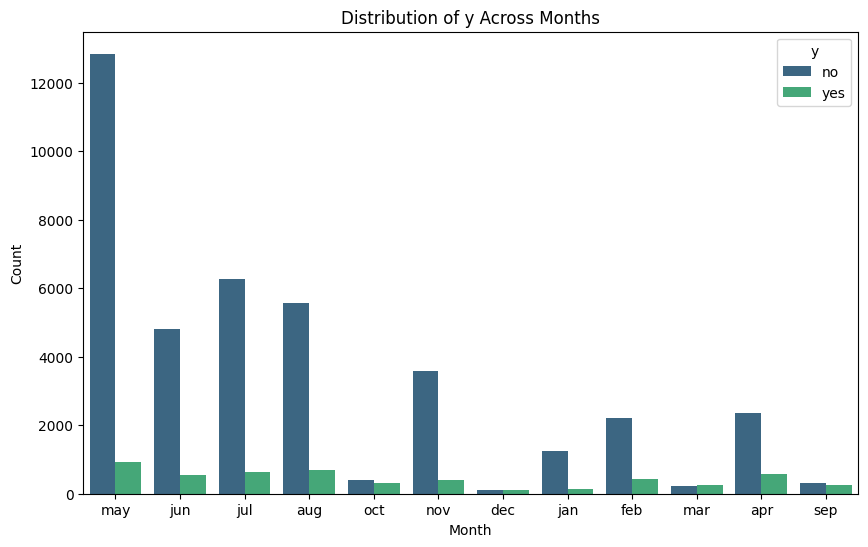

In [319]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='y', data=df, palette='viridis')
plt.title('Distribution of y Across Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

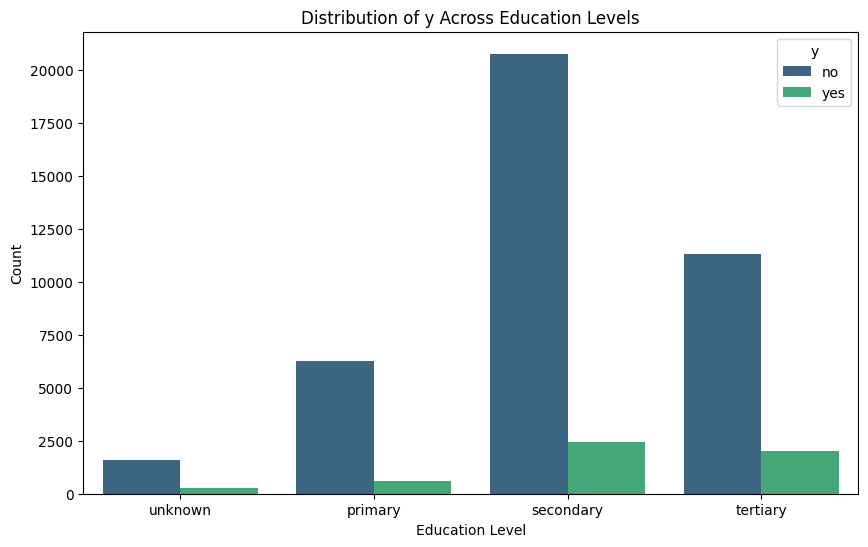

In [320]:
df['education'] = pd.Categorical(df['education'], categories=['unknown', 'primary', 'secondary', 'tertiary'], ordered=True)
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=df, palette='viridis')
plt.title('Distribution of y Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

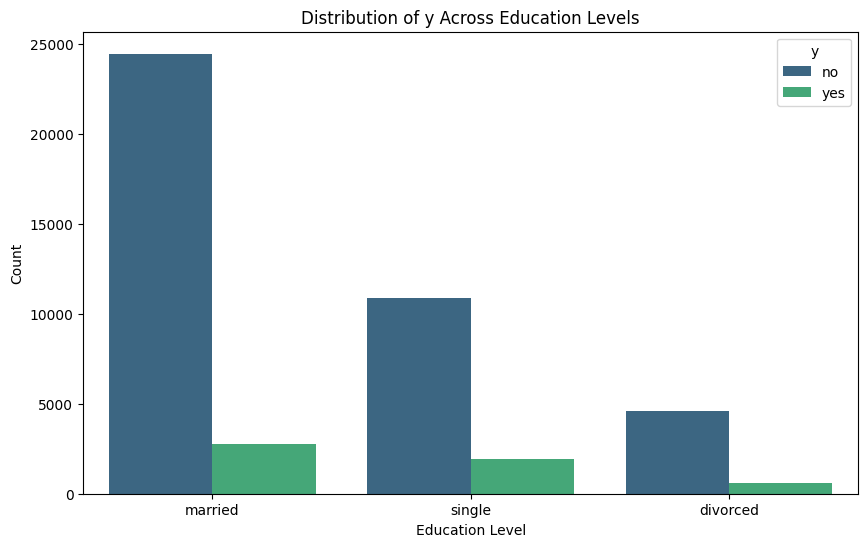

In [321]:
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='y', data=df, palette='viridis')
plt.title('Distribution of y Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In [322]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month'] = df['month'].map(month_mapping)

In [323]:
df['day_of_week'] = pd.to_datetime(df['day'], format='%d').dt.day_name()

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          45211 non-null  int64   
 1   job          45211 non-null  object  
 2   marital      45211 non-null  object  
 3   education    45211 non-null  category
 4   default      45211 non-null  object  
 5   balance      45211 non-null  int64   
 6   housing      45211 non-null  object  
 7   loan         45211 non-null  object  
 8   contact      45211 non-null  object  
 9   day          45211 non-null  int64   
 10  month        45211 non-null  int64   
 11  duration     45211 non-null  int64   
 12  campaign     45211 non-null  int64   
 13  pdays        45211 non-null  int64   
 14  previous     45211 non-null  int64   
 15  poutcome     45211 non-null  object  
 16  y            45211 non-null  object  
 17  day_of_week  45211 non-null  object  
dtypes: category(1), int64(8), 

In [325]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome','day_of_week']

df = pd.get_dummies(df, columns=categorical_columns)
#df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

boolean_columns = df.select_dtypes(include='bool').columns
df[boolean_columns] = df[boolean_columns].astype(int)

In [326]:
df['duration_poutcome_interaction'] = df['duration'] * df['poutcome_success']

In [327]:
out1 = df[df['age'] > 80]
out1

,age,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,...,poutcome_success,poutcome_unknown,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,duration_poutcome_interaction
29158,83,425,2,2,912,1,-1,0,no,0,...,0,1,0,0,0,0,0,1,0,0
29322,83,6236,2,2,283,2,-1,0,no,0,...,0,1,0,0,0,0,0,1,0,0
31051,83,3349,12,2,89,1,-1,0,no,0,...,0,1,1,0,0,0,0,0,0,0
31055,85,12114,12,2,165,2,-1,0,yes,0,...,0,1,1,0,0,0,0,0,0,0
31069,90,1,13,2,152,3,-1,0,yes,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44830,81,1154,17,9,231,1,-1,0,yes,0,...,0,1,0,0,0,0,0,0,1,0
44875,82,928,23,9,217,2,188,3,no,0,...,0,0,0,0,0,0,0,1,0,0
44892,89,0,27,9,157,5,-1,0,no,0,...,0,1,0,0,1,0,0,0,0,0
44893,81,949,27,9,188,2,280,1,yes,0,...,0,0,0,0,1,0,0,0,0,0


In [328]:
out2 = df[df['balance'] > 80000]
out2

,age,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,...,poutcome_success,poutcome_unknown,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,duration_poutcome_interaction
26227,59,98417,20,11,145,5,-1,0,no,0,...,0,1,0,0,1,0,0,0,0,0
39989,51,102127,3,6,90,1,-1,0,no,0,...,0,1,0,0,0,0,0,0,1,0
42558,84,81204,28,12,679,1,313,2,yes,0,...,0,0,0,0,0,1,0,0,0,0
43393,84,81204,1,4,390,1,94,3,yes,0,...,1,0,0,1,0,0,0,0,0,390


In [329]:
out3 = df[df['duration'] > 1000]
out3

,age,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,...,poutcome_success,poutcome_unknown,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,duration_poutcome_interaction
37,53,-3,5,5,1666,1,-1,0,no,0,...,0,1,1,0,0,0,0,0,0,0
43,54,529,5,5,1492,1,-1,0,no,0,...,0,1,1,0,0,0,0,0,0,0
59,46,179,5,5,1778,1,-1,0,no,0,...,0,1,1,0,0,0,0,0,0,0
83,59,2343,5,5,1042,1,-1,0,yes,1,...,0,1,1,0,0,0,0,0,0,0
86,56,45,5,5,1467,1,-1,0,yes,1,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45031,42,1289,15,10,1176,3,92,6,yes,0,...,1,0,0,1,0,0,0,0,0,1176
45072,54,5475,21,10,1032,1,91,4,yes,0,...,1,0,0,0,0,1,0,0,0,1032
45199,34,1475,16,11,1166,3,530,12,no,0,...,0,0,0,0,0,0,0,1,0,0
45200,38,557,16,11,1556,4,-1,0,yes,0,...,0,1,0,0,0,0,0,1,0,0


In [330]:
df = df[
    (df['age'] <= 80) & 
    (df['balance'] <= 80000) & 
    (df['duration'] <= 1000) & 
    (df['campaign'] <= 40)
]

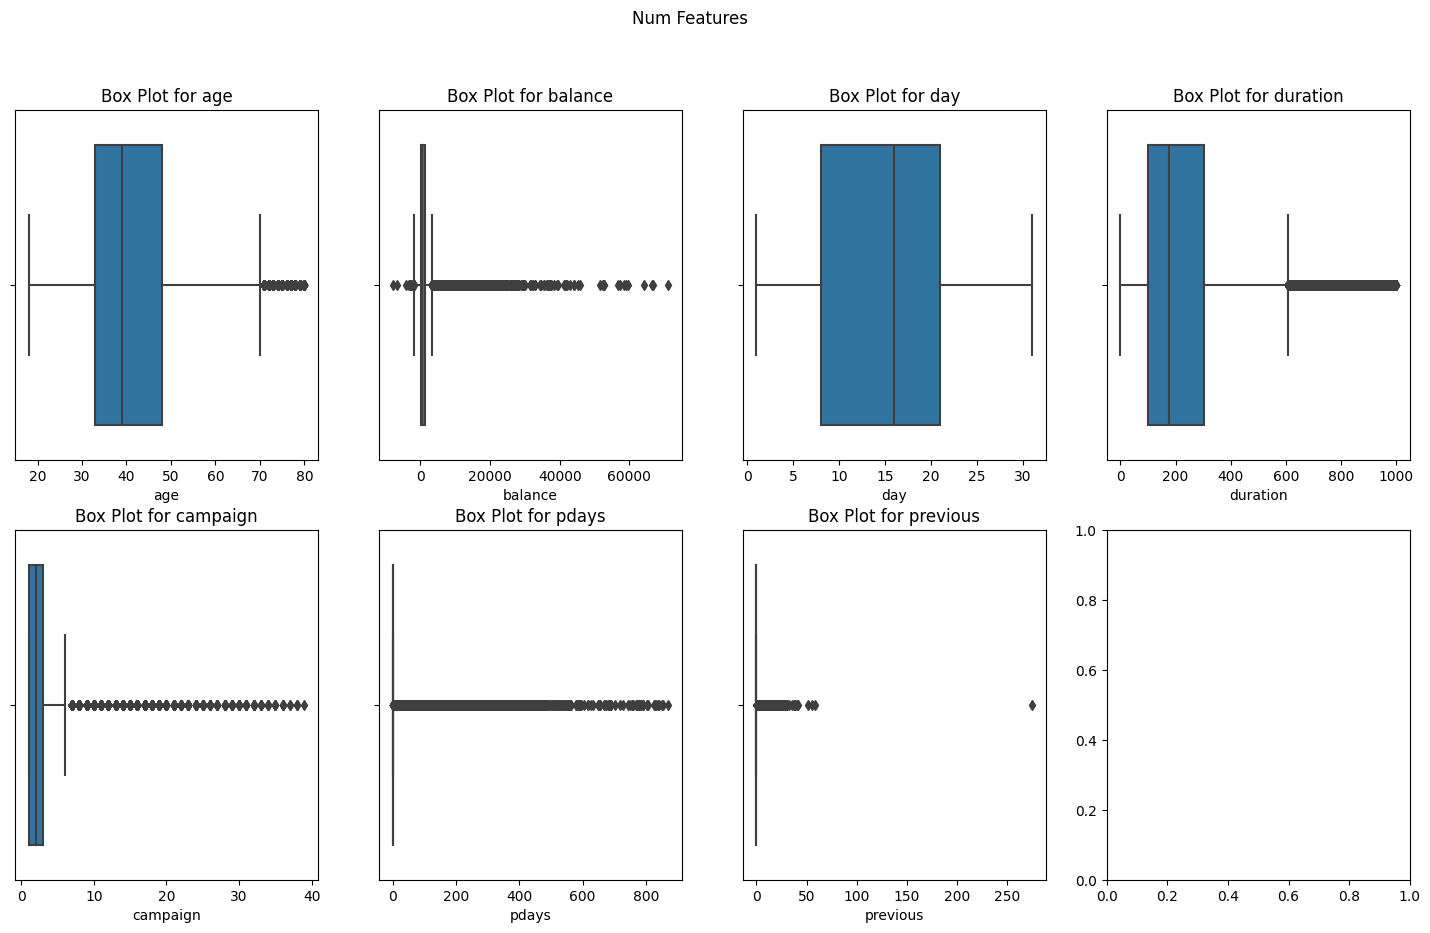

In [331]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
fig.suptitle('Num Features')

axes = axes.flatten()
for i, column in enumerate(numeric_columns.columns):
    sns.boxplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44043 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   age                            44043 non-null  int64 
 1   balance                        44043 non-null  int64 
 2   day                            44043 non-null  int64 
 3   month                          44043 non-null  int64 
 4   duration                       44043 non-null  int64 
 5   campaign                       44043 non-null  int64 
 6   pdays                          44043 non-null  int64 
 7   previous                       44043 non-null  int64 
 8   y                              44043 non-null  object
 9   job_admin.                     44043 non-null  int32 
 10  job_blue-collar                44043 non-null  int32 
 11  job_entrepreneur               44043 non-null  int32 
 12  job_housemaid                  44043 non-null  int32 
 13  job_ma

In [333]:
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,...,poutcome_success,poutcome_unknown,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,duration_poutcome_interaction
0,58,2143,5,5,261,1,-1,0,no,0,...,0,1,1,0,0,0,0,0,0,0
1,44,29,5,5,151,1,-1,0,no,0,...,0,1,1,0,0,0,0,0,0,0
2,33,2,5,5,76,1,-1,0,no,0,...,0,1,1,0,0,0,0,0,0,0
3,47,1506,5,5,92,1,-1,0,no,0,...,0,1,1,0,0,0,0,0,0,0
4,33,1,5,5,198,1,-1,0,no,0,...,0,1,1,0,0,0,0,0,0,0


In [334]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

End of Part 1

Explanatation:

After reading the dataset, general analysis has been performed to look at the distribution of values for both numerical and string type fields.
This gave me an idea of where numerical values were lying as well as what can be done for the categorical columns.

EDA and Data transformation:

1. Based on the box plot, outliers have been removed using age, duration, balance, campaign.
2. Day of the week field has been created and encoded
3. Duration of outcome success has been created to determine duration of previously successful outcomes
4. Month field has been encoded to numerical designations
5. All other categorical fields have been converted into dummy variables for ease of correlation

Observations:
1. May has a significantly high call volume than any other months, however conversion is not proportional and similar to most months.
2. Tertiary education level seems to have the best ratio of calls to conversion.
3. Age has a left skew with the most calls being directed and folks between 20-40, peaking at about 30. That may be because that is the age when people start getting financially responsible and have a higher chance of conversion to a deposit.
4. Marital status does not seem like a good determinant, as the conversion is very proportional to the number of calls, and no particular marital status has a significantly higher conversion.

Part 2: Baseline Models

Correlation Matrix

In [335]:
correlation_matrix = df.corr()
correlations_y = correlation_matrix['y'].abs()
correlations = correlations_y.sort_values(ascending=False)
print(correlations)

y                                1.000000
duration                         0.359463
poutcome_success                 0.325811
duration_poutcome_interaction    0.318511
poutcome_unknown                 0.182714
contact_unknown                  0.157175
housing_yes                      0.147853
housing_no                       0.147853
contact_cellular                 0.144300
pdays                            0.114608
previous                         0.101169
job_student                      0.083453
campaign                         0.079866
job_blue-collar                  0.076129
job_retired                      0.075294
loan_yes                         0.074004
loan_no                          0.074004
education_tertiary               0.071742
marital_single                   0.065283
marital_married                  0.057640
balance                          0.052899
education_primary                0.046688
education_secondary              0.037621
job_management                   0

Logistic Regression and tuning parameters

In [336]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

features = ['duration', 'poutcome_success', 'contact_unknown', 'housing_yes', 'duration_poutcome_interaction','contact_unknown','pdays','previous','housing_no','contact_cellular']

X = df[features]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_train_time = time.time() 

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

end_train_time = time.time()
y_pred = model.predict(X_test)

elapsed_train_time = end_train_time - start_train_time
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)
print(elapsed_train_time)

Accuracy: 0.9119

Confusion Matrix:
[[7786  126]
 [ 650  247]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7912
           1       0.66      0.28      0.39       897

    accuracy                           0.91      8809
   macro avg       0.79      0.63      0.67      8809
weighted avg       0.90      0.91      0.90      8809

0.6742031574249268


C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [337]:
#from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced', None],
    'max_iter': [100, 200, 300] 
}

logreg = LogisticRegression(random_state=42)

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: Conve

{'C': 0.1,
 'class_weight': None,
 'max_iter': 200,
 'penalty': 'none',
 'solver': 'lbfgs'}

In [338]:
features = ['duration', 'poutcome_success', 'contact_unknown', 'housing_yes', 'duration_poutcome_interaction','contact_unknown','pdays','previous','housing_no','contact_cellular']

X = df[features]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_train_time = time.time() 

model = LogisticRegression(C=0.1, random_state=42, max_iter=200, solver='lbfgs')
model.fit(X_train, y_train)

end_train_time = time.time()
y_pred = model.predict(X_test)

elapsed_train_time = end_train_time - start_train_time
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)
print(elapsed_train_time)


Accuracy: 0.9145

Confusion Matrix:
[[7777  135]
 [ 618  279]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7912
           1       0.67      0.31      0.43       897

    accuracy                           0.91      8809
   macro avg       0.80      0.65      0.69      8809
weighted avg       0.90      0.91      0.90      8809

1.4403033256530762


C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN model and parameter tuning

In [339]:
start_train_time = time.time()

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
end_train_time = time.time()
elapsed_train_time = end_train_time - start_train_time

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print(f'KNN Model Accuracy: {accuracy_knn:.4f}')
print('\nKNN Model Confusion Matrix:')
print(conf_matrix_knn)
print('\nKNN Model Classification Report:')
print(classification_rep_knn)
print(elapsed_train_time)


KNN Model Accuracy: 0.9061

KNN Model Confusion Matrix:
[[7672  240]
 [ 587  310]]

KNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7912
           1       0.56      0.35      0.43       897

    accuracy                           0.91      8809
   macro avg       0.75      0.66      0.69      8809
weighted avg       0.89      0.91      0.90      8809

0.22998976707458496


In [340]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [341]:
start_train_time = time.time()

knn_model = KNeighborsClassifier(n_neighbors=9, p=1, weights='uniform')
knn_model.fit(X_train, y_train)
end_train_time = time.time()
elapsed_train_time = end_train_time - start_train_time

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print(f'KNN Model Accuracy: {accuracy_knn:.4f}')
print('\nKNN Model Confusion Matrix:')
print(conf_matrix_knn)
print('\nKNN Model Classification Report:')
print(classification_rep_knn)
print(elapsed_train_time)


KNN Model Accuracy: 0.9075

KNN Model Confusion Matrix:
[[7696  216]
 [ 599  298]]

KNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7912
           1       0.58      0.33      0.42       897

    accuracy                           0.91      8809
   macro avg       0.75      0.65      0.69      8809
weighted avg       0.89      0.91      0.90      8809

0.19976091384887695


In [342]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [343]:

from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=9, p=1, weights='uniform')
knn.fit(X_resampled, y_resampled)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'KNN Model Accuracy: {accuracy:.4f}')
print('\nKNN Model Confusion Matrix:')
print(conf_matrix)
print('\nKNN Model Classification Report:')
print(classification_rep)


KNN Model Accuracy: 0.8572

KNN Model Confusion Matrix:
[[7019  893]
 [ 365  532]]

KNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7912
           1       0.37      0.59      0.46       897

    accuracy                           0.86      8809
   macro avg       0.66      0.74      0.69      8809
weighted avg       0.89      0.86      0.87      8809



End of part 2

Correlation Matrix has been performed to determine the best features to be considered for modeling. While there maybe some features that I have not picked that will work better on some models than others, I am choosing to stick to the chosen 10 ones for all models to maintain consistency and compare performance effectively.

Models tested and tuned using best parameters
1. Logistic Regression 
2. KNN Model

Additionally, I attempted to correct sampling by taking a minority sample, however this seems to have made the model perform poorer so the reason behind lower precision and recall is not the sample.

Verdict:

While the accuracy is almost similar for both models, I am looking at precision and recall as the evaluation metrics. In this particular business problem, precision is more critical given that the goal is convert as many calls as possible, so precision takes priority over recall since we can afford to miss a few positive instances. As the logistic model performed better wrt precision, between these two models the suggestion would be to implement logistic regression model.


Part 3: Ensemble models

Random Forest and tuning parameters

In [344]:
start_train_time = time.time()
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

end_train_time = time.time()
elapsed_train_time = end_train_time - start_train_time

y_pred_rf = rf_model.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)


print(f'Random Forest Model Accuracy: {accuracy_rf:.4f}')
print('\nRandom Forest Model Confusion Matrix:')
print(conf_matrix_rf)
print('\nRandom Forest Model Classification Report:')
print(classification_rep_rf)
print(elapsed_train_time)


Random Forest Model Accuracy: 0.9051

Random Forest Model Confusion Matrix:
[[7649  263]
 [ 573  324]]

Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7912
           1       0.55      0.36      0.44       897

    accuracy                           0.91      8809
   macro avg       0.74      0.66      0.69      8809
weighted avg       0.89      0.91      0.90      8809

7.491020441055298


In [345]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters:", random_search.best_params_)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 450}


In [359]:
start_train_time = time.time()
rf_model = RandomForestClassifier(max_depth= 10, min_samples_leaf= 4, min_samples_split=15, n_estimators= 450)
rf_model.fit(X_train, y_train)

end_train_time = time.time()
elapsed_train_time = end_train_time - start_train_time

y_pred_rf = rf_model.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display the evaluation metrics
print(f'Random Forest Model Accuracy: {accuracy_rf:.4f}')
print('\nRandom Forest Model Confusion Matrix:')
print(conf_matrix_rf)
print('\nRandom Forest Model Classification Report:')
print(classification_rep_rf)
print(elapsed_train_time)


Random Forest Model Accuracy: 0.9162

Random Forest Model Confusion Matrix:
[[7802  110]
 [ 628  269]]

Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.95      7912
           1       0.71      0.30      0.42       897

    accuracy                           0.92      8809
   macro avg       0.82      0.64      0.69      8809
weighted avg       0.90      0.92      0.90      8809

11.643133401870728


AdaBoost and tuning parameters

In [347]:

start_train_time = time.time()  
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
end_train_time = time.time()

elapsed_train_time = end_train_time - start_train_time

y_pred_adaboost = adaboost_model.predict(X_test)


accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
classification_rep_adaboost = classification_report(y_test, y_pred_adaboost)


print(f'AdaBoost Model Accuracy: {accuracy_adaboost:.4f}')
print('\nAdaBoost Model Confusion Matrix:')
print(conf_matrix_adaboost)
print('\nAdaBoost Model Classification Report:')
print(classification_rep_adaboost)
print(elapsed_train_time)


AdaBoost Model Accuracy: 0.9124

AdaBoost Model Confusion Matrix:
[[7713  199]
 [ 573  324]]

AdaBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7912
           1       0.62      0.36      0.46       897

    accuracy                           0.91      8809
   macro avg       0.78      0.67      0.70      8809
weighted avg       0.90      0.91      0.90      8809

0.48308610916137695


In [348]:

adaboost_model = AdaBoostClassifier(random_state=42)


param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search_adaboost = GridSearchCV(adaboost_model, param_grid_adaboost, cv=3, scoring='accuracy')

grid_search_adaboost.fit(X_train, y_train)

best_params_adaboost = grid_search_adaboost.best_params_
print(best_params_adaboost)


{'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 200}


In [349]:
start_train_time = time.time()  
adaboost_model = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.2, n_estimators= 200, random_state=42)
adaboost_model.fit(X_train, y_train)
end_train_time = time.time()

elapsed_train_time = end_train_time - start_train_time

y_pred_adaboost = adaboost_model.predict(X_test)


accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
classification_rep_adaboost = classification_report(y_test, y_pred_adaboost)

# Display the evaluation metrics
print(f'AdaBoost Model Accuracy: {accuracy_adaboost:.4f}')
print('\nAdaBoost Model Confusion Matrix:')
print(conf_matrix_adaboost)
print('\nAdaBoost Model Classification Report:')
print(classification_rep_adaboost)
print(elapsed_train_time)

AdaBoost Model Accuracy: 0.9158

AdaBoost Model Confusion Matrix:
[[7772  140]
 [ 602  295]]

AdaBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7912
           1       0.68      0.33      0.44       897

    accuracy                           0.92      8809
   macro avg       0.80      0.66      0.70      8809
weighted avg       0.90      0.92      0.90      8809

2.1573238372802734


Bagging classifier and tuning parameters

In [350]:

start_train_time = time.time()  
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)
end_train_time = time.time() 

elapsed_train_time = end_train_time - start_train_time

y_pred_bagging = bagging_model.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
classification_rep_bagging = classification_report(y_test, y_pred_bagging)


print(f'Bagging Classifier Model Accuracy: {accuracy_bagging:.4f}')
print('\nBagging Classifier Model Confusion Matrix:')
print(conf_matrix_bagging)
print('\nBagging Classifier Model Classification Report:')
print(classification_rep_bagging)
print(elapsed_train_time)


Bagging Classifier Model Accuracy: 0.9012

Bagging Classifier Model Confusion Matrix:
[[7647  265]
 [ 605  292]]

Bagging Classifier Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7912
           1       0.52      0.33      0.40       897

    accuracy                           0.90      8809
   macro avg       0.73      0.65      0.67      8809
weighted avg       0.89      0.90      0.89      8809

0.3377516269683838


In [351]:
bagging_model = BaggingClassifier(random_state=42)

# Define the hyperparameter grid
param_grid_bagging = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

# Initialize GridSearchCV
grid_search_bagging = GridSearchCV(estimator=bagging_model, param_grid=param_grid_bagging, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_bagging.fit(X_train, y_train)

# Get the best parameters
best_params_bagging = grid_search_bagging.best_params_

# Print the best parameters
print(f'Best Hyperparameters for Bagging Classifier: {best_params_bagging}')


Best Hyperparameters for Bagging Classifier: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}


In [360]:

start_train_time = time.time()  
bagging_model = BaggingClassifier(random_state=42, max_features=0.5, max_samples=0.5, n_estimators=50)
bagging_model.fit(X_train, y_train)
end_train_time = time.time() 

elapsed_train_time = end_train_time - start_train_time

y_pred_bagging = bagging_model.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
classification_rep_bagging = classification_report(y_test, y_pred_bagging)


print(f'Bagging Classifier Model Accuracy: {accuracy_bagging:.4f}')
print('\nBagging Classifier Model Confusion Matrix:')
print(conf_matrix_bagging)
print('\nBagging Classifier Model Classification Report:')
print(classification_rep_bagging)
print(elapsed_train_time)


Bagging Classifier Model Accuracy: 0.9120

Bagging Classifier Model Confusion Matrix:
[[7861   51]
 [ 724  173]]

Bagging Classifier Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7912
           1       0.77      0.19      0.31       897

    accuracy                           0.91      8809
   macro avg       0.84      0.59      0.63      8809
weighted avg       0.90      0.91      0.89      8809

1.2779920101165771


Voting classifier using Logistic, Random and Ada(hard)

In [353]:

log_reg = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
adaboost_model = AdaBoostClassifier(random_state=42)

start_train_time = time.time()  
voting_classifier = VotingClassifier(
    estimators=[('log_reg', log_reg), ('rf', rf_model), ('adaboost', adaboost_model)],
    voting='hard'  
)

voting_classifier.fit(X_train, y_train)
end_train_time = time.time() 

y_pred_voting = voting_classifier.predict(X_test)
elapsed_train_time = end_train_time - start_train_time

accuracy_voting = accuracy_score(y_test, y_pred_voting)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
classification_rep_voting = classification_report(y_test, y_pred_voting)

print(f'Voting Classifier Model Accuracy: {accuracy_voting:.4f}')
print('\nVoting Classifier Model Confusion Matrix:')
print(conf_matrix_voting)
print('\nVoting Classifier Model Classification Report:')
print(classification_rep_voting)
print(elapsed_train_time)


C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Model Accuracy: 0.9152

Voting Classifier Model Confusion Matrix:
[[7757  155]
 [ 592  305]]

Voting Classifier Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7912
           1       0.66      0.34      0.45       897

    accuracy                           0.92      8809
   macro avg       0.80      0.66      0.70      8809
weighted avg       0.90      0.92      0.90      8809

6.302786827087402


Voting classifier using Logistic, Random and Ada(soft)

In [354]:

log_reg = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
adaboost_model = AdaBoostClassifier(random_state=42)

start_train_time = time.time()  
voting_classifier = VotingClassifier(
    estimators=[('log_reg', log_reg), ('rf', rf_model), ('adaboost', adaboost_model)],
    voting='soft'  
)

voting_classifier.fit(X_train, y_train)
end_train_time = time.time() 

y_pred_voting = voting_classifier.predict(X_test)
elapsed_train_time = end_train_time - start_train_time

accuracy_voting = accuracy_score(y_test, y_pred_voting)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
classification_rep_voting = classification_report(y_test, y_pred_voting)

print(f'Voting Classifier Model Accuracy: {accuracy_voting:.4f}')
print('\nVoting Classifier Model Confusion Matrix:')
print(conf_matrix_voting)
print('\nVoting Classifier Model Classification Report:')
print(classification_rep_voting)
print(elapsed_train_time)


C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Model Accuracy: 0.9140

Voting Classifier Model Confusion Matrix:
[[7759  153]
 [ 605  292]]

Voting Classifier Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7912
           1       0.66      0.33      0.44       897

    accuracy                           0.91      8809
   macro avg       0.79      0.65      0.69      8809
weighted avg       0.90      0.91      0.90      8809

6.475095510482788


Voting Classifier with Logistic, SVC and Ada(hard)

In [357]:

from sklearn.svm import SVC  


log_reg = LogisticRegression(random_state=42)
svm_model = SVC(probability=True, random_state=42) 
adaboost_model = AdaBoostClassifier(random_state=42)


start_train_time = time.time()  


voting_classifier = VotingClassifier(
    estimators=[('log_reg', log_reg), ('svm', svm_model), ('adaboost', adaboost_model)],
    voting='hard'  
)

voting_classifier.fit(X_train, y_train)
end_train_time = time.time() 

elapsed_train_time = end_train_time - start_train_time

y_pred_voting = voting_classifier.predict(X_test)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
classification_rep_voting = classification_report(y_test, y_pred_voting)


print(f'Voting Classifier Model Accuracy: {accuracy_voting:.4f}')
print('\nVoting Classifier Model Confusion Matrix:')
print(conf_matrix_voting)
print('\nVoting Classifier Model Classification Report:')
print(classification_rep_voting)
print(elapsed_train_time)

C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Model Accuracy: 0.9172

Voting Classifier Model Confusion Matrix:
[[7781  131]
 [ 598  299]]

Voting Classifier Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      7912
           1       0.70      0.33      0.45       897

    accuracy                           0.92      8809
   macro avg       0.81      0.66      0.70      8809
weighted avg       0.90      0.92      0.90      8809

148.29416799545288


Voting Classifier with Logistic, SVC and Ada(soft)

In [358]:

from sklearn.svm import SVC  


log_reg = LogisticRegression(random_state=42)
svm_model = SVC(probability=True, random_state=42) 
adaboost_model = AdaBoostClassifier(random_state=42)


start_train_time = time.time()  


voting_classifier = VotingClassifier(
    estimators=[('log_reg', log_reg), ('svm', svm_model), ('adaboost', adaboost_model)],
    voting='soft'  
)

voting_classifier.fit(X_train, y_train)
end_train_time = time.time() 

elapsed_train_time = end_train_time - start_train_time

y_pred_voting = voting_classifier.predict(X_test)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
classification_rep_voting = classification_report(y_test, y_pred_voting)


print(f'Voting Classifier Model Accuracy: {accuracy_voting:.4f}')
print('\nVoting Classifier Model Confusion Matrix:')
print(conf_matrix_voting)
print('\nVoting Classifier Model Classification Report:')
print(classification_rep_voting)
print(elapsed_train_time)

C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Model Accuracy: 0.9134

Voting Classifier Model Confusion Matrix:
[[7839   73]
 [ 690  207]]

Voting Classifier Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7912
           1       0.74      0.23      0.35       897

    accuracy                           0.91      8809
   macro avg       0.83      0.61      0.65      8809
weighted avg       0.90      0.91      0.89      8809

148.07216906547546


Part 4:

Comparison of all models, including base models:

1. Highest Precision:
The Voting Classifier using Logistic, SVC, and AdaBoost (Soft) has the highest precision for predicting Class 1, indicating fewer false positives.

2. Best Recall:
The models with the best recall for predicting Class 1 are AdaBoost and the Voting Classifier using Logistic, AdaBoost, and Random Forest (Hard). They both balance precision and recall for positive instances.

3. Accuracy Consideration:
AdaBoost maintains a good balance between precision, recall, and accuracy, making it a robust choice.

Recommendation:
Considering precision, recall, and accuracy, AdaBoost remains a strong choice for a balance between predictive performance and computational efficiency.

Part 5: Interpretation and Justification

1. Why did the ensemble models perform the way they did?

Ensemble models, like Random Forest and AdaBoost, shine because they team up multiple weaker models, each bringing its unique strengths. This helps them handle the complexity of the data better than base models like Logistic Regression or KNN. The ensemble's ability to deal with tricky patterns and class imbalances in the dataset gives them an edge. The combined power of these models provides more reliable predictions on new, unseen data. I was hoping these models would have provided better precsion results than the models given the rigourous sampling they do by testing weak learners. However, that was not the case.

2. If you had to pick one model to implement in business process, which would it be and why?

Among our models, the Voting Classifier (Hard) using Logistic, SVC, and AdaBoost stands out. It strikes a good balance between precision, recall, and overall accuracy. This mix is crucial for making smart business decisions. Even though it's a bit more computationally intensive, the benefits of improved accuracy and balanced performance make it worth the investment. Moreover, this model aligns with the business need for clear and understandable predictions, which is vital for building trust with stakeholders.

3. What decision criteria did you use to arrive at this conclusion?

I decision-making focused on finding a sweet spot between precision (getting predictions right) and recall (capturing all relevant cases). I wanted a model that's not only effective but also easy to understand. I considered computational cost, nut it wasnt as important as model effectiveness because the dataset was small. The chosen model is not just a good performer but also fits well with any business's preference for clear decision-making.